<a href="https://colab.research.google.com/github/AdaTuanaDonmez/AdaTuanaDonmez/blob/main/w_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance

stock_symbol = "TSLA"

start_date = "2016-01-01"

end_date = "2021-01-01"

dataset = yfinance.download(tickers = stock_symbol,
                  start= start_date,
                  end = end_date)

dataset

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500
...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-01-04 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
import numpy


dataset["Decrease"] = numpy.where(dataset["Volume"].shift(-1) >  dataset["Volume"],
                                  1,
                                  0)     #if decreases compared to the previous day assigns 1 if not 0
dataset

,Open,High,Low,Close,Adj Close,Volume,Decrease
Date,,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500,0
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000,1
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500,0
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500,1
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500,1
...,...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,1
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,1


In [ ]:

dataset["Buy"] = numpy.where(dataset["Adj Close"].shift(-1) >  dataset["Adj Close"],
                                  1,
                                  -1)     #if decreases compared to the previous day assigns 1 (buy) if not -1(sell)

dataset

,Open,High,Low,Close,Adj Close,Volume,Decrease,Buy
Date,,,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500,0,1
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000,1,-1
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500,0,-1
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500,1,-1
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500,1,-1
...,...,...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,1,1
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0,1
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,1,1


In [ ]:
#pct_change() percent change function

dataset["Returns"] =  dataset["Adj Close"].pct_change()

dataset

,Open,High,Low,Close,Adj Close,Volume,Decrease,Buy,Returns
Date,,,,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500,0,1,NaN
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000,1,-1,0.000090
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500,0,-1,-0.019648
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500,1,-1,-0.015477
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500,1,-1,-0.021563
...,...,...,...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,1,1,0.024443
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0,1,0.002901
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,1,1,0.003466


In [ ]:
dataset = dataset.dropna()

dataset

,Open,High,Low,Close,Adj Close,Volume,Decrease,Buy,Returns
Date,,,,,,,,,
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000,1,-1,0.000090
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500,0,-1,-0.019648
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500,1,-1,-0.015477
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500,1,-1,-0.021563
2016-01-11,14.267333,14.296667,13.533333,13.856667,13.856667,61371000,0,1,-0.014929
...,...,...,...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,1,1,0.024443
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0,1,0.002901
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,1,1,0.003466


In [ ]:
dataset["Class"] = numpy.where(dataset["Returns"].shift(-1) > dataset["Returns"],
                               "Negative",
                               "Positive")
dataset

<ipython-input-8-180de5f2b06f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Class"] = numpy.where(dataset["Returns"].shift(-1) > dataset["Returns"],


,Open,High,Low,Close,Adj Close,Volume,Decrease,Buy,Returns,Class
Date,,,,,,,,,,
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000,1,-1,0.000090,Positive
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500,0,-1,-0.019648,Negative
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500,1,-1,-0.015477,Positive
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500,1,-1,-0.021563,Negative
2016-01-11,14.267333,14.296667,13.533333,13.856667,13.856667,61371000,0,1,-0.014929,Negative
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,1,1,0.024443,Positive
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0,1,0.002901,Negative
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,1,1,0.003466,Negative


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Decrease,Buy,Returns
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,34.219961,35.016940,33.397903,34.284686,34.284686,1.314686e+08,0.464229,0.039746,0.002857
std,40.138507,41.271609,38.959884,40.353248,40.353248,9.230904e+07,0.498917,0.999607,0.036401
min,9.488000,10.331333,9.403333,9.578000,9.578000,2.489250e+07,0.000000,-1.000000,-0.210628
25%,15.777500,16.067501,15.508000,15.848500,15.848500,7.166288e+07,0.000000,-1.000000,-0.014340
50%,20.506666,20.917333,20.129333,20.580334,20.580334,1.034415e+08,0.000000,1.000000,0.001324
75%,23.868500,24.316833,23.479167,23.842999,23.842999,1.561474e+08,1.000000,1.000000,0.019224
max,233.330002,239.573334,230.373337,235.223328,235.223328,9.140820e+08,1.000000,1.000000,0.198949


In [ ]:
dataset.isnull().values.any()   #checks if there is any null values

False

In [ ]:
dataset.groupby("Adj Close").size()

Adj Close
9.578000      1
9.866000      1
9.883333      1
10.031333     1
10.069333     1
             ..
221.229996    1
221.996674    1
231.593338    1
231.666672    1
235.223328    1
Length: 1233, dtype: int64

In [ ]:
dataset.groupby("Class").size()

Class
Negative    626
Positive    632
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

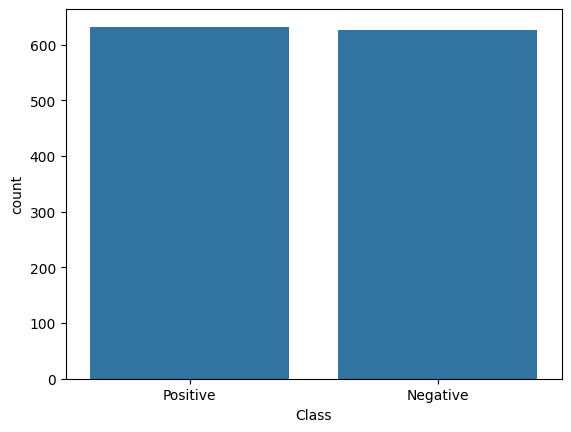

In [ ]:
import seaborn

seaborn.countplot(x = "Class",
                  data = dataset)

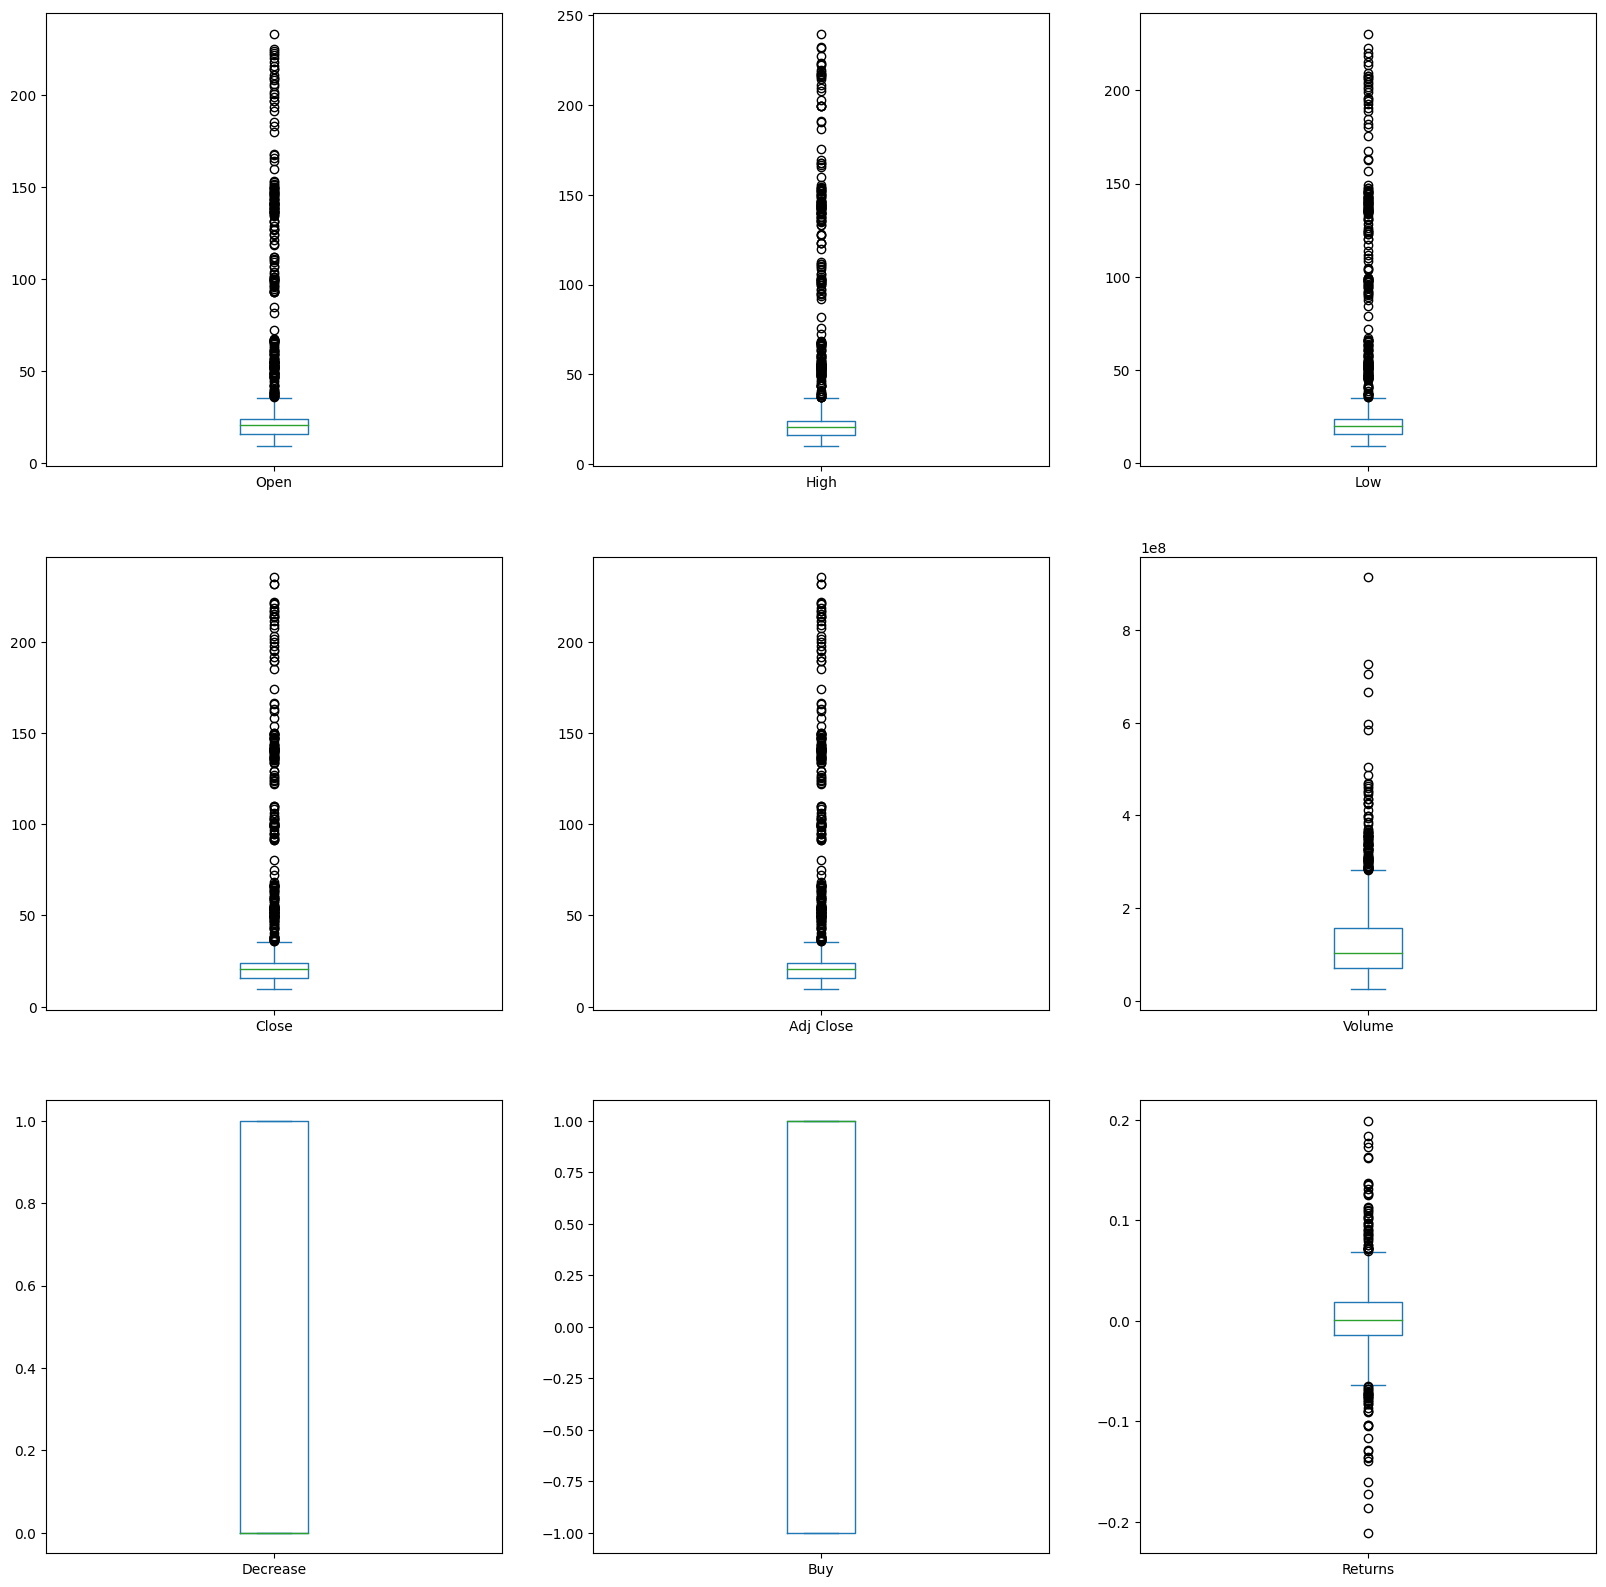

In [ ]:
import matplotlib.pyplot as pyplot

#the box is the average, other dots are outliers
dataset.plot( kind = "box",
             subplots = True,
              layout = (3,3),
              sharex = False,
              sharey = False,
              figsize = (20,20))
pyplot.show()

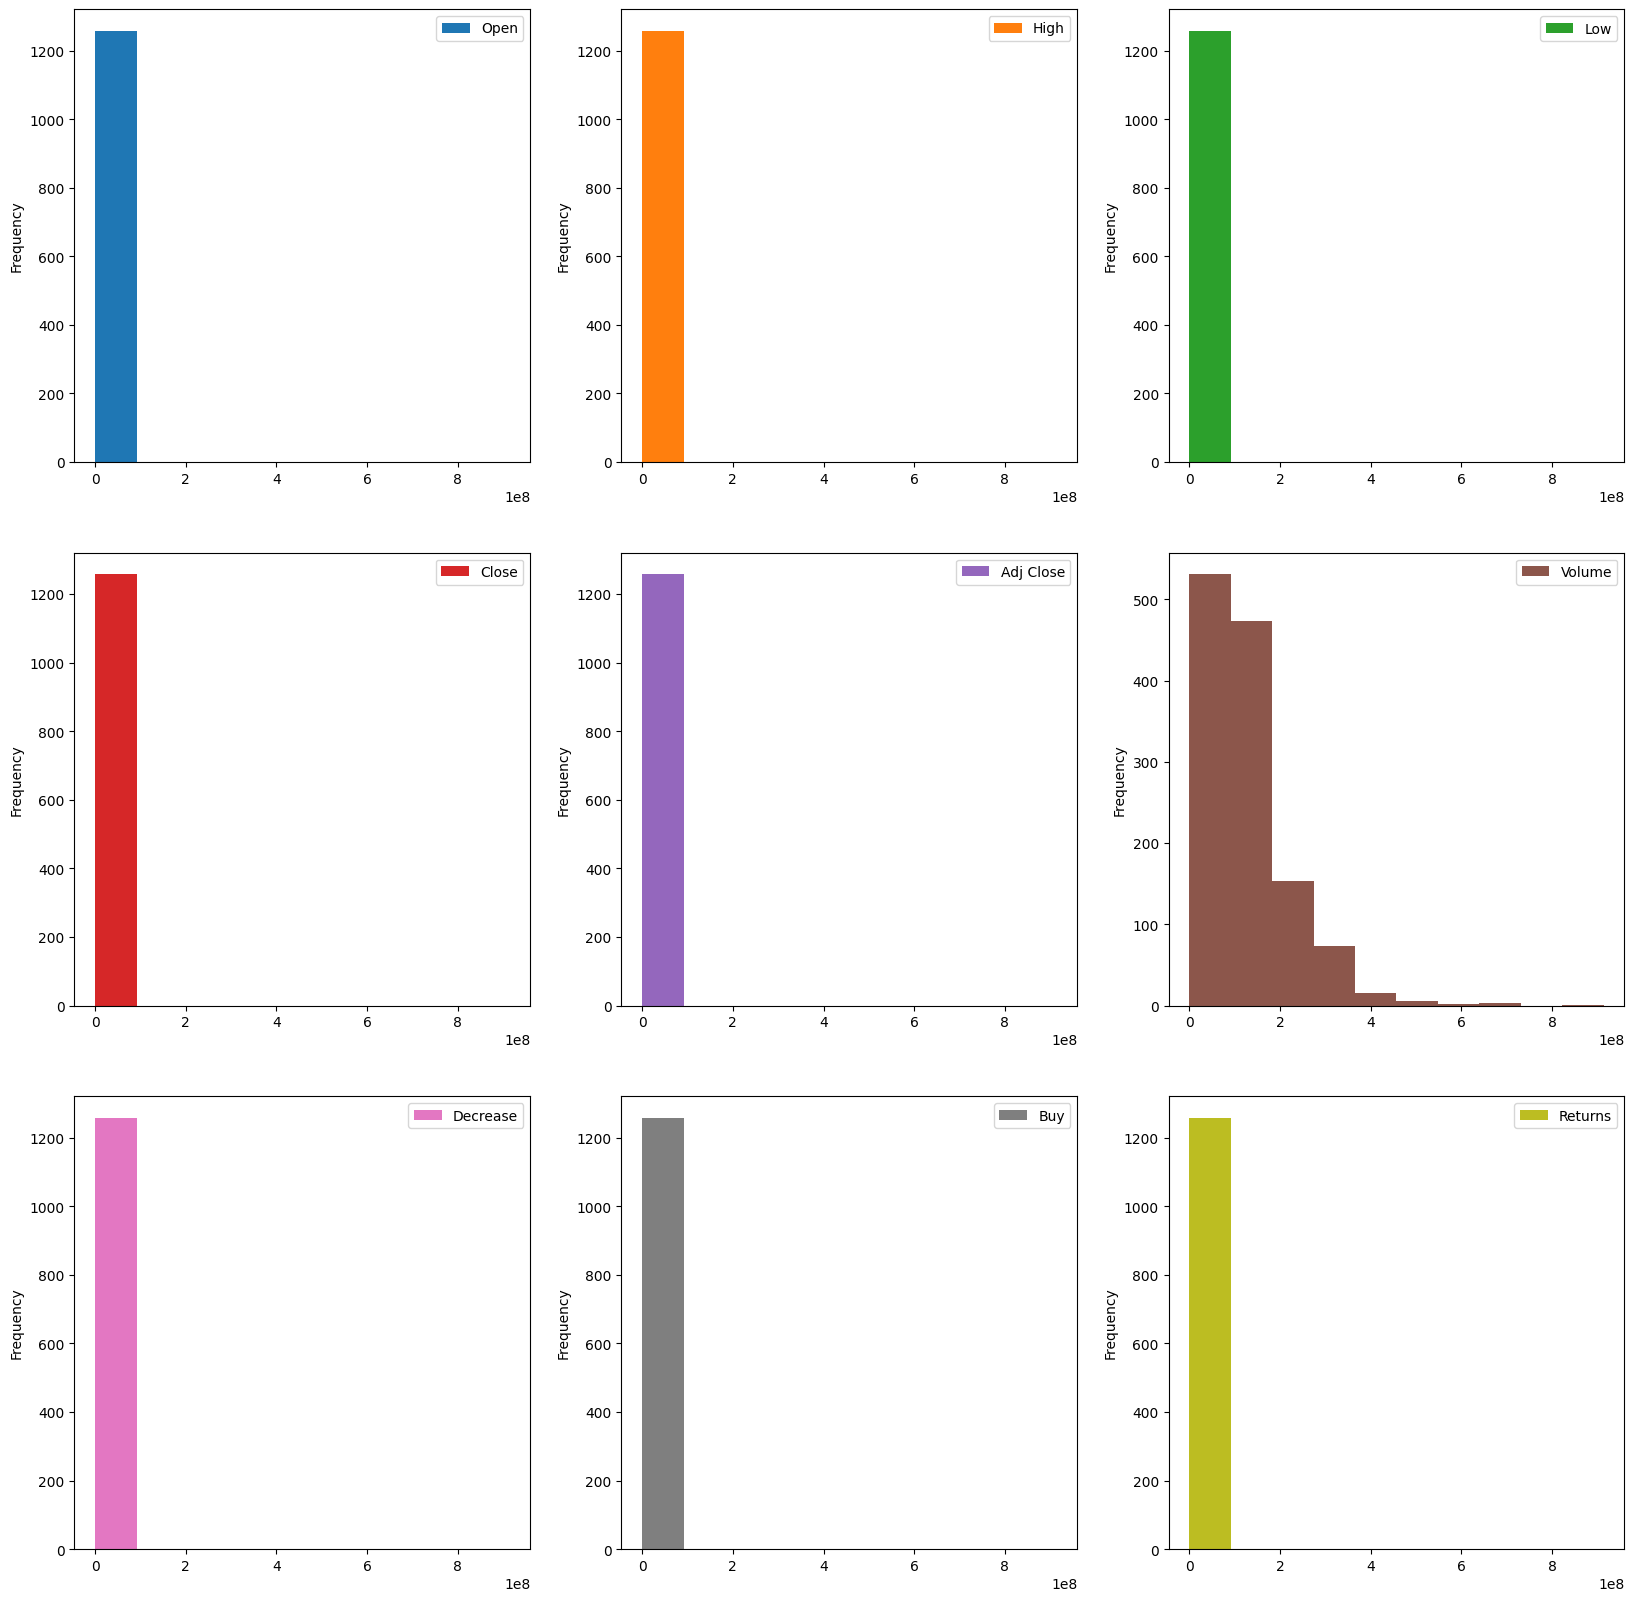

In [ ]:
dataset.plot( kind = "hist",
             subplots = True,
              layout = (3,3),
              sharex = False,
              sharey = False,
              figsize = (20,20))
pyplot.show()

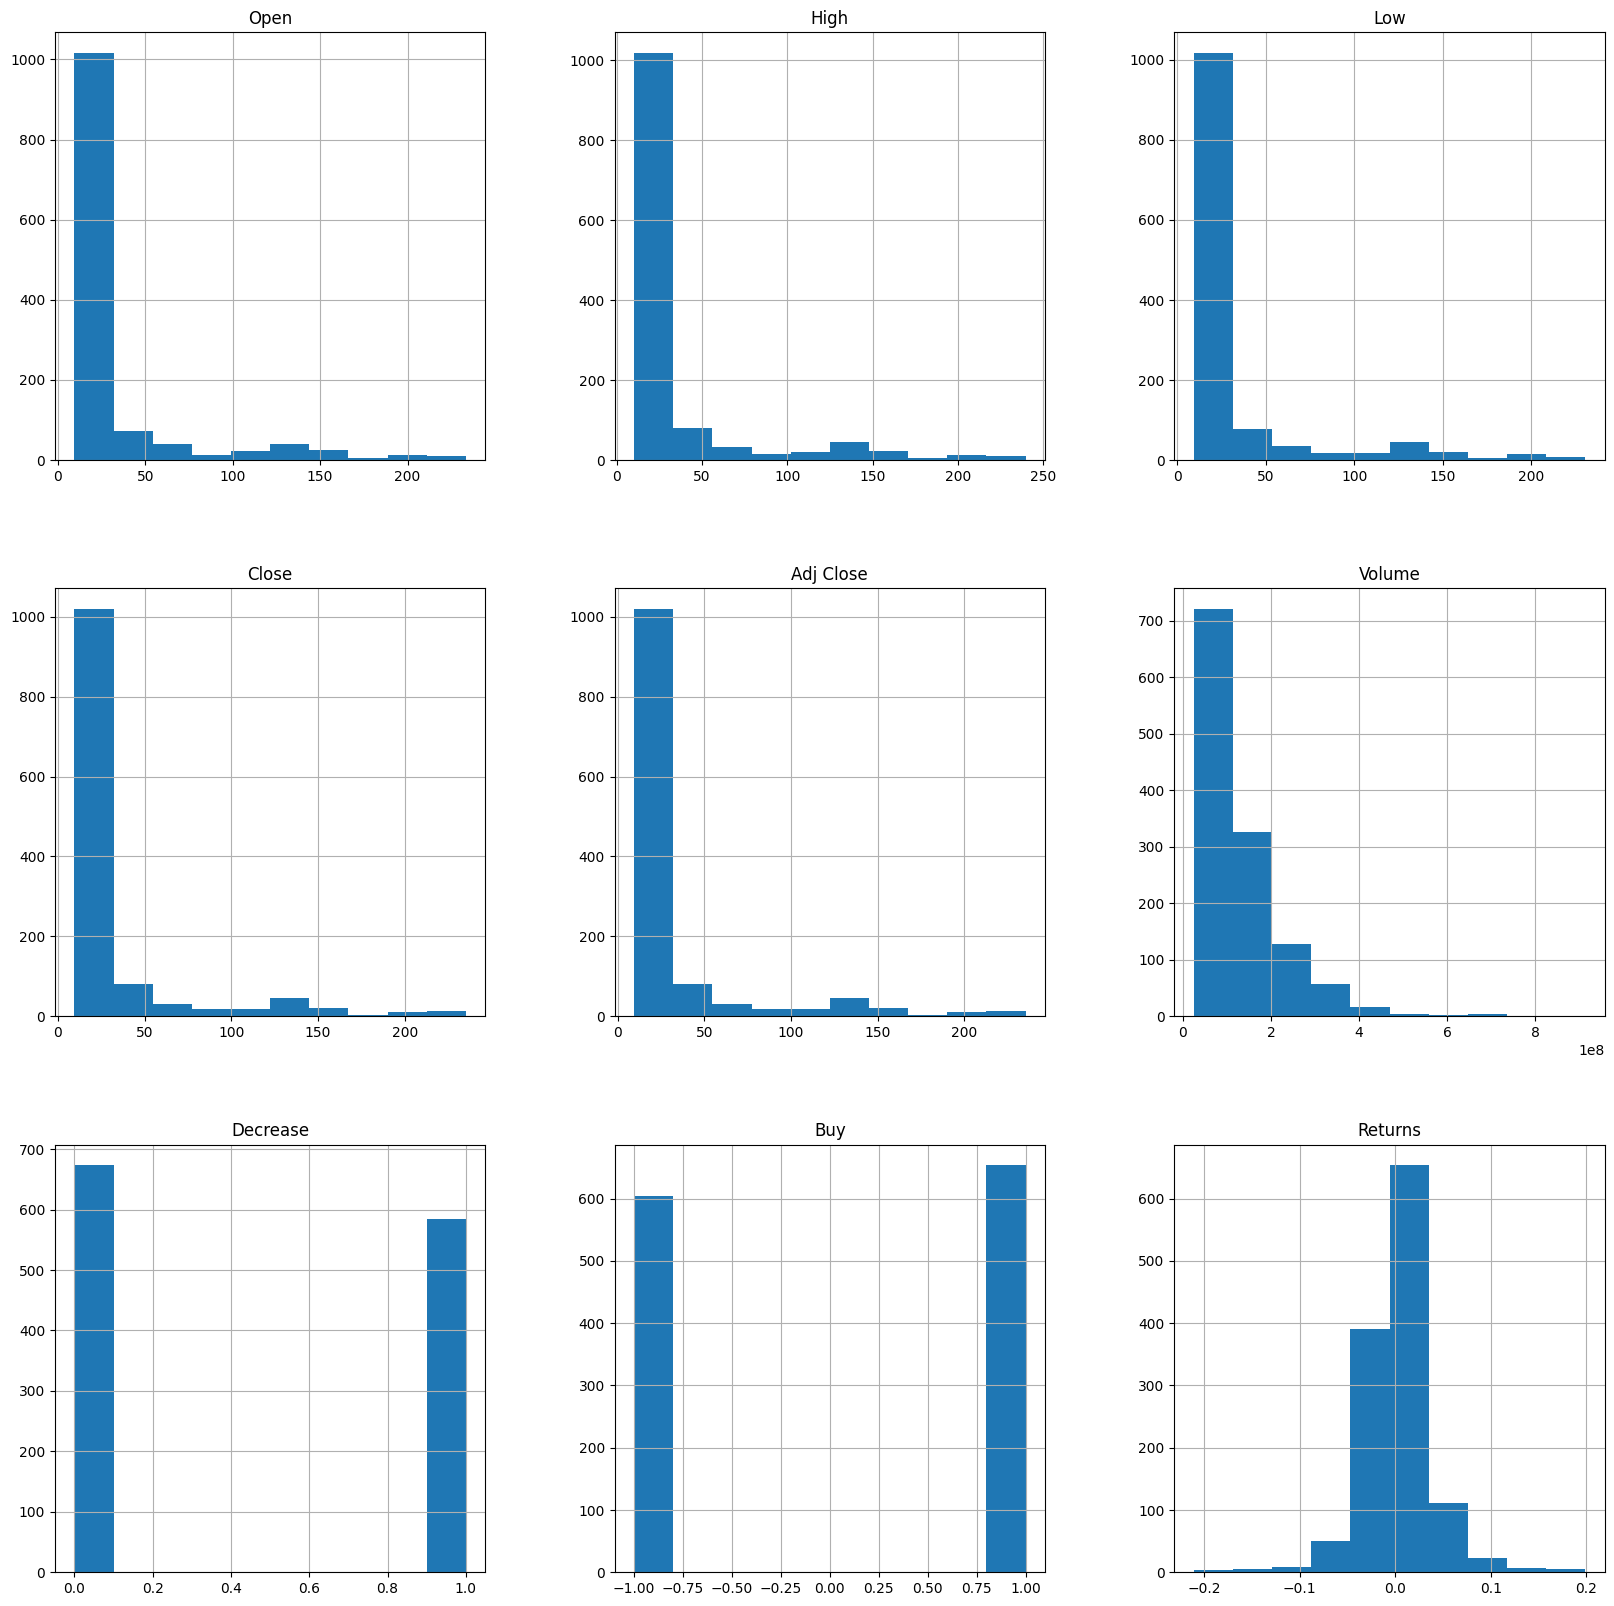

In [ ]:
dataset.hist(figsize = (20,20))

pyplot.show()

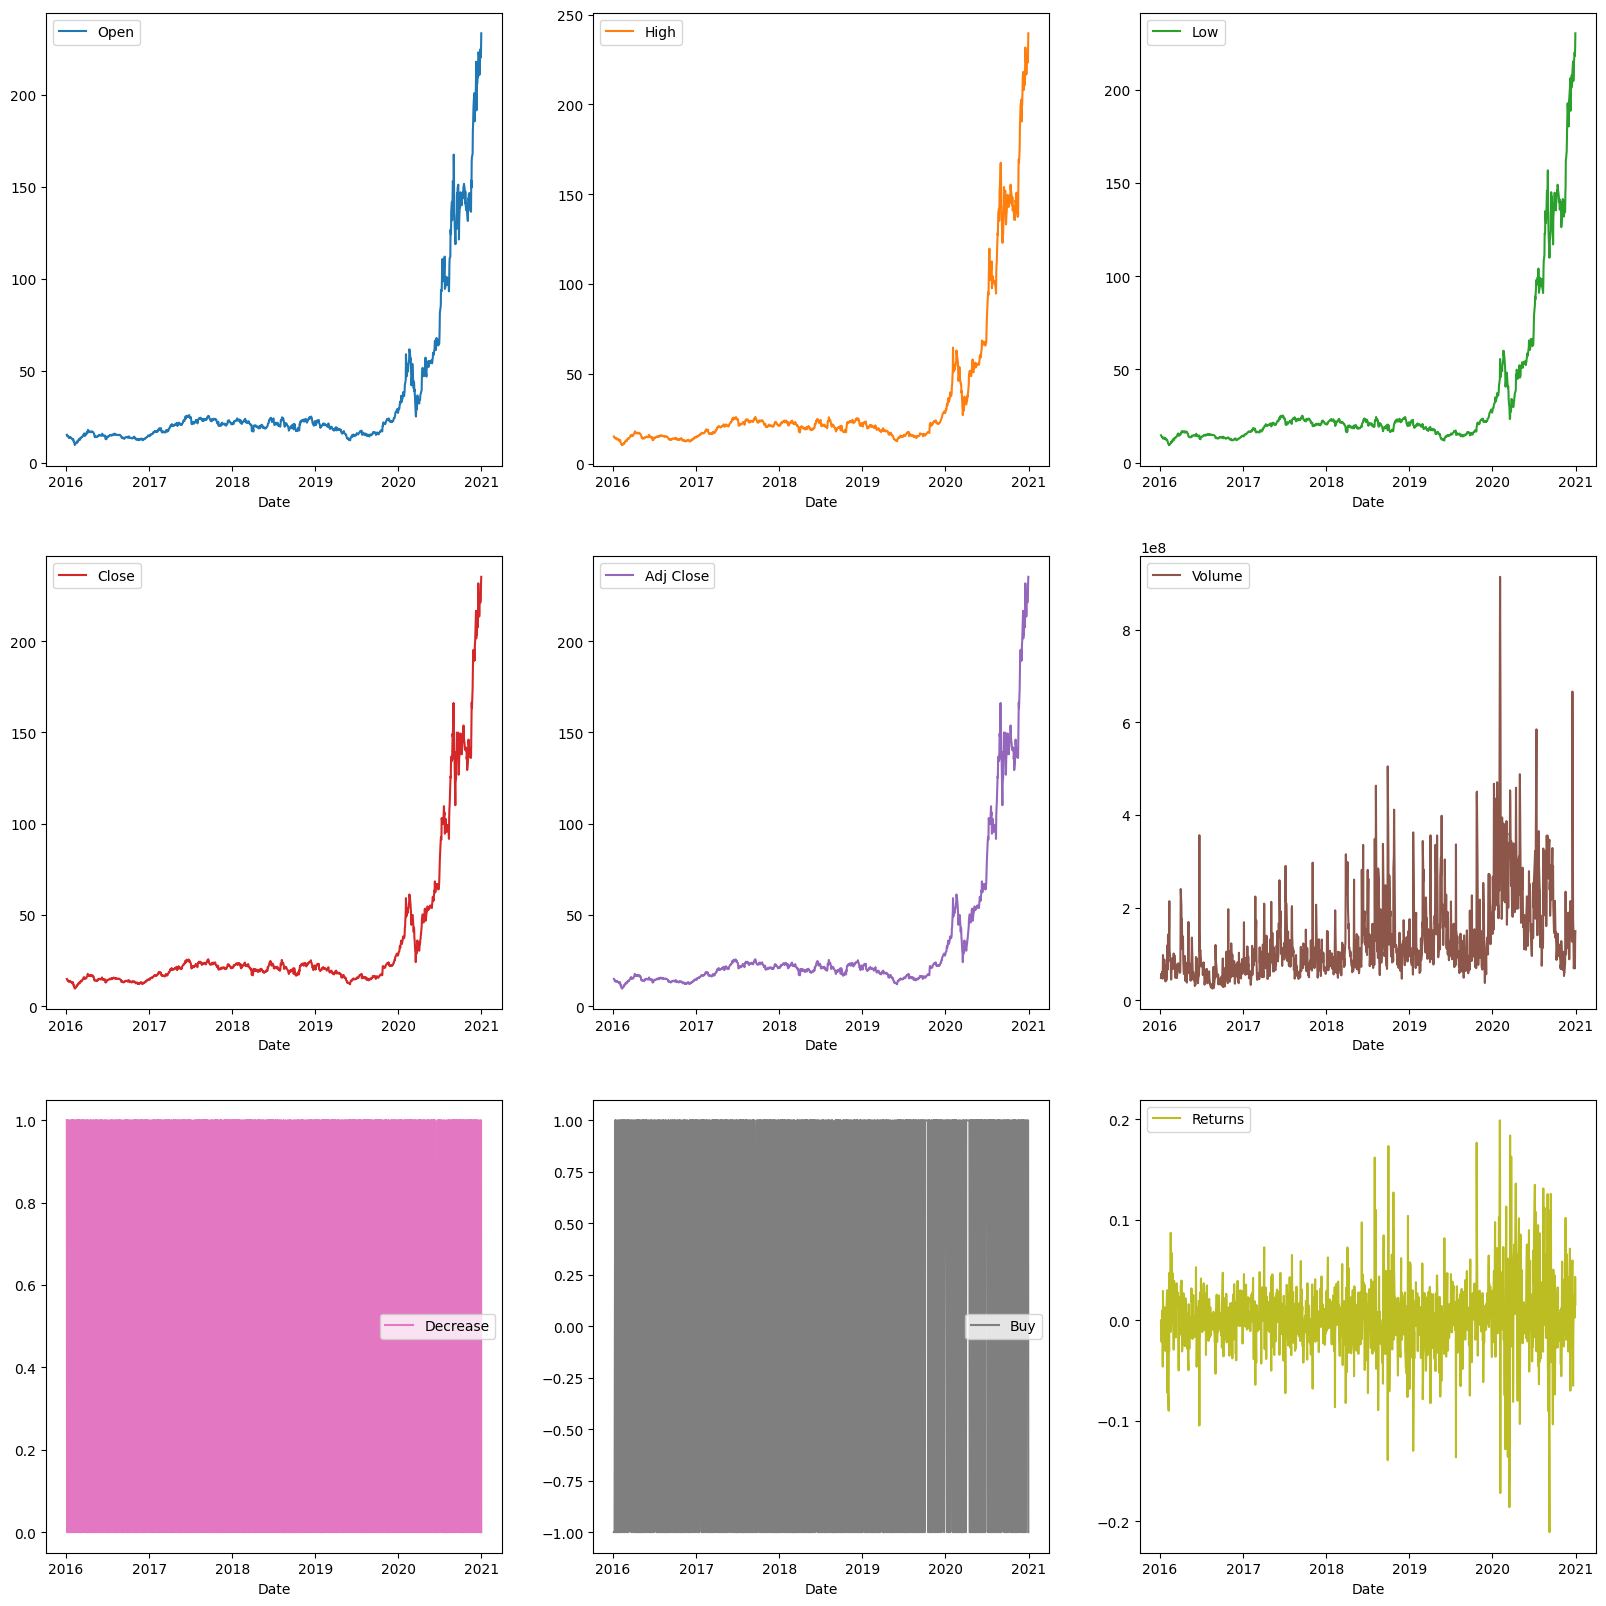

In [ ]:
dataset.plot( kind = "line",
             subplots = True,
              layout = (3,3),
              sharex = False,
              sharey = False,
              figsize = (20,20))
pyplot.show()

#decrease and buy are categorical values

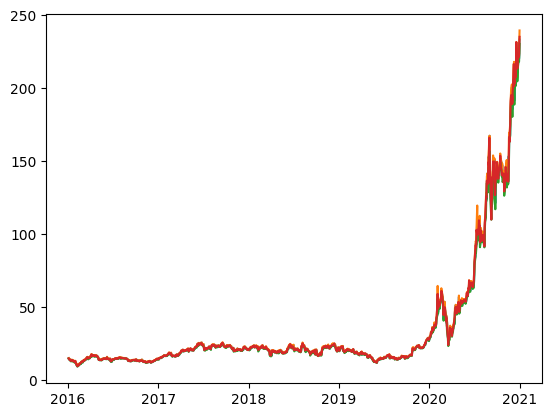

In [ ]:
stock_prices = dataset[["Open", "High", "Low", "Adj Close"]]

pyplot.plot(stock_prices)

pyplot.show()

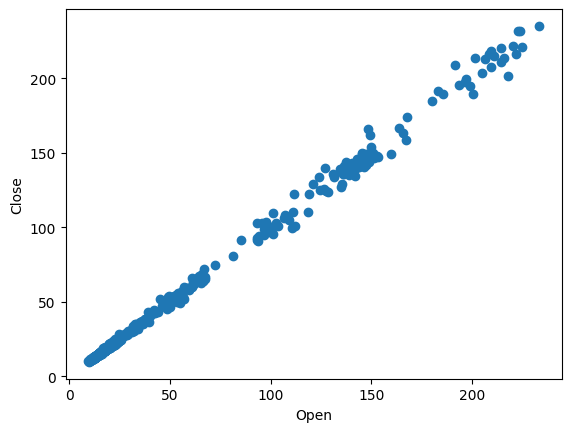

In [ ]:
pyplot.scatter([dataset["Open"]], [dataset["Close"]])

pyplot.xlabel("Open")
pyplot.ylabel("Close")

pyplot.show()

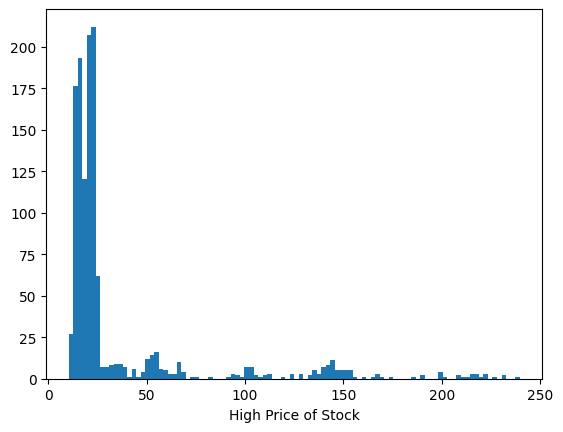

In [ ]:
pyplot.hist(dataset["High"], bins = 100)

pyplot.xlabel("High Price of Stock")

pyplot.show()

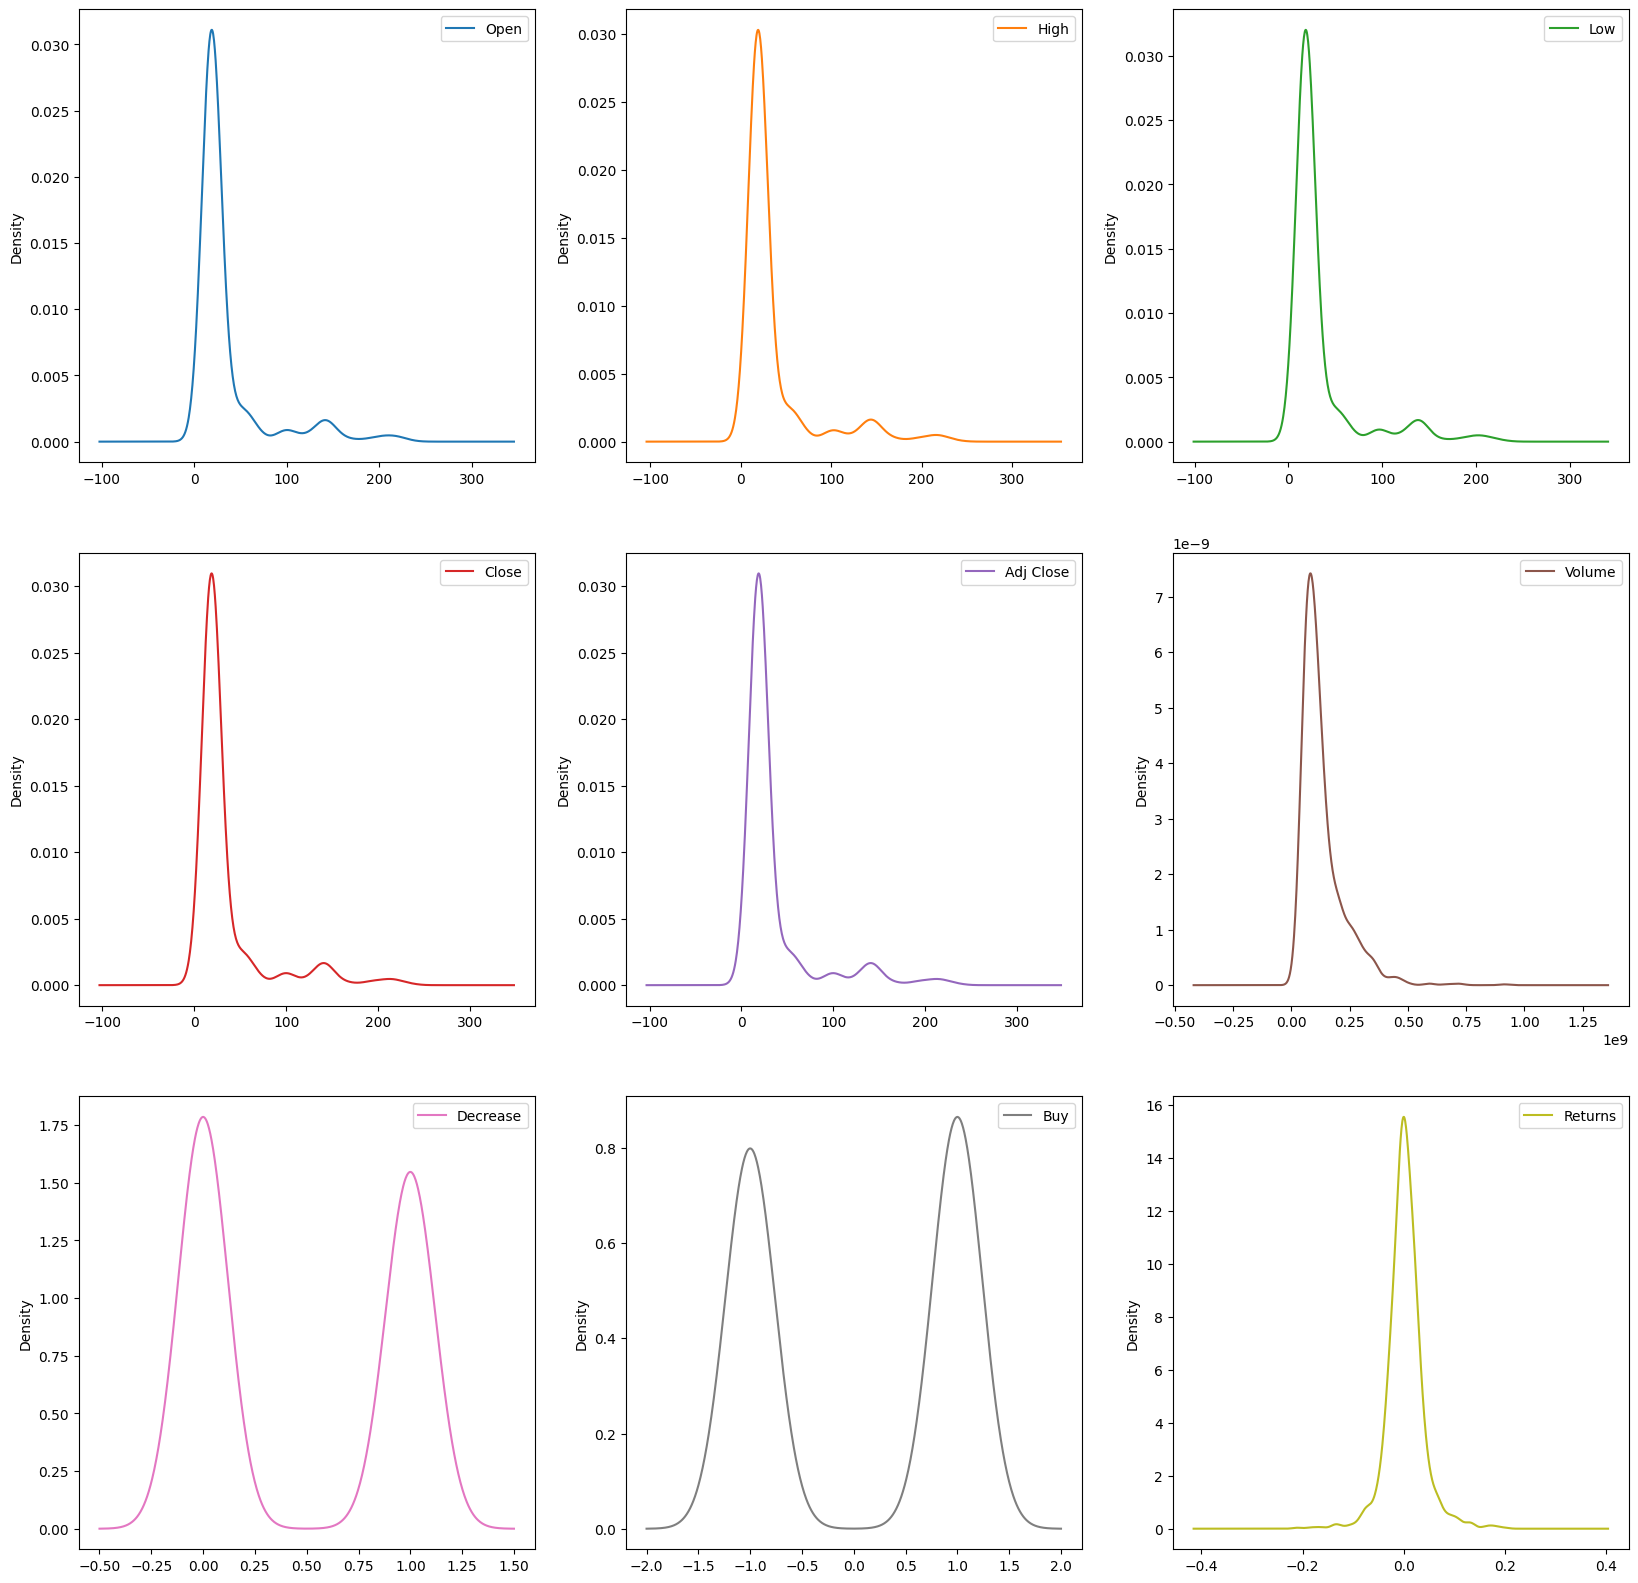

In [ ]:
dataset.plot( kind = "density",
             subplots = True,
              layout = (3,3),
              sharex = False,
              sharey = False,
              figsize = (20,20))
pyplot.show()

In [ ]:
sizes = stock_prices.iloc[0]

sizes

Open         15.090667
High         15.126000
Low          14.666667
Adj Close    14.895333
Name: 2016-01-05 00:00:00, dtype: float64

([<matplotlib.patches.Wedge at 0x7de5d4633c10>,
 [Text(0.7718265794019209, 0.7837625477966721, 'Open'),
  Text(-0.7969233549352444, 0.7582302858358763, 'High'),
  Text(-0.7622689673324562, -0.7930611713114638, 'Low'),
  Text(0.7798314632068385, -0.7757982269847499, 'Adj Close')],
 [Text(0.42099631603741133, 0.42750684425273017, '25.24'),
  Text(-0.43468546632831506, 0.4135801559104779, '25.30'),
  Text(-0.4157830730904306, -0.43257882071534387, '24.53'),
  Text(0.4253626162946391, -0.423162669264409, '24.92')])

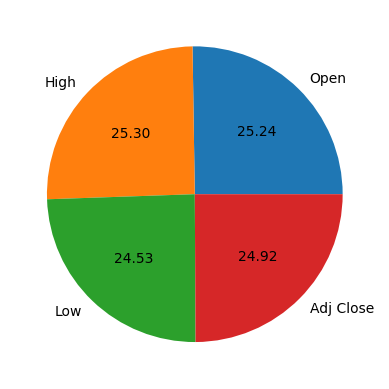

In [ ]:
column_names = ["Open", "High", "Low", "Adj Close"]

pyplot.pie(sizes,
           labels = column_names,
           autopct = "%.2f")  # 2 decimal places

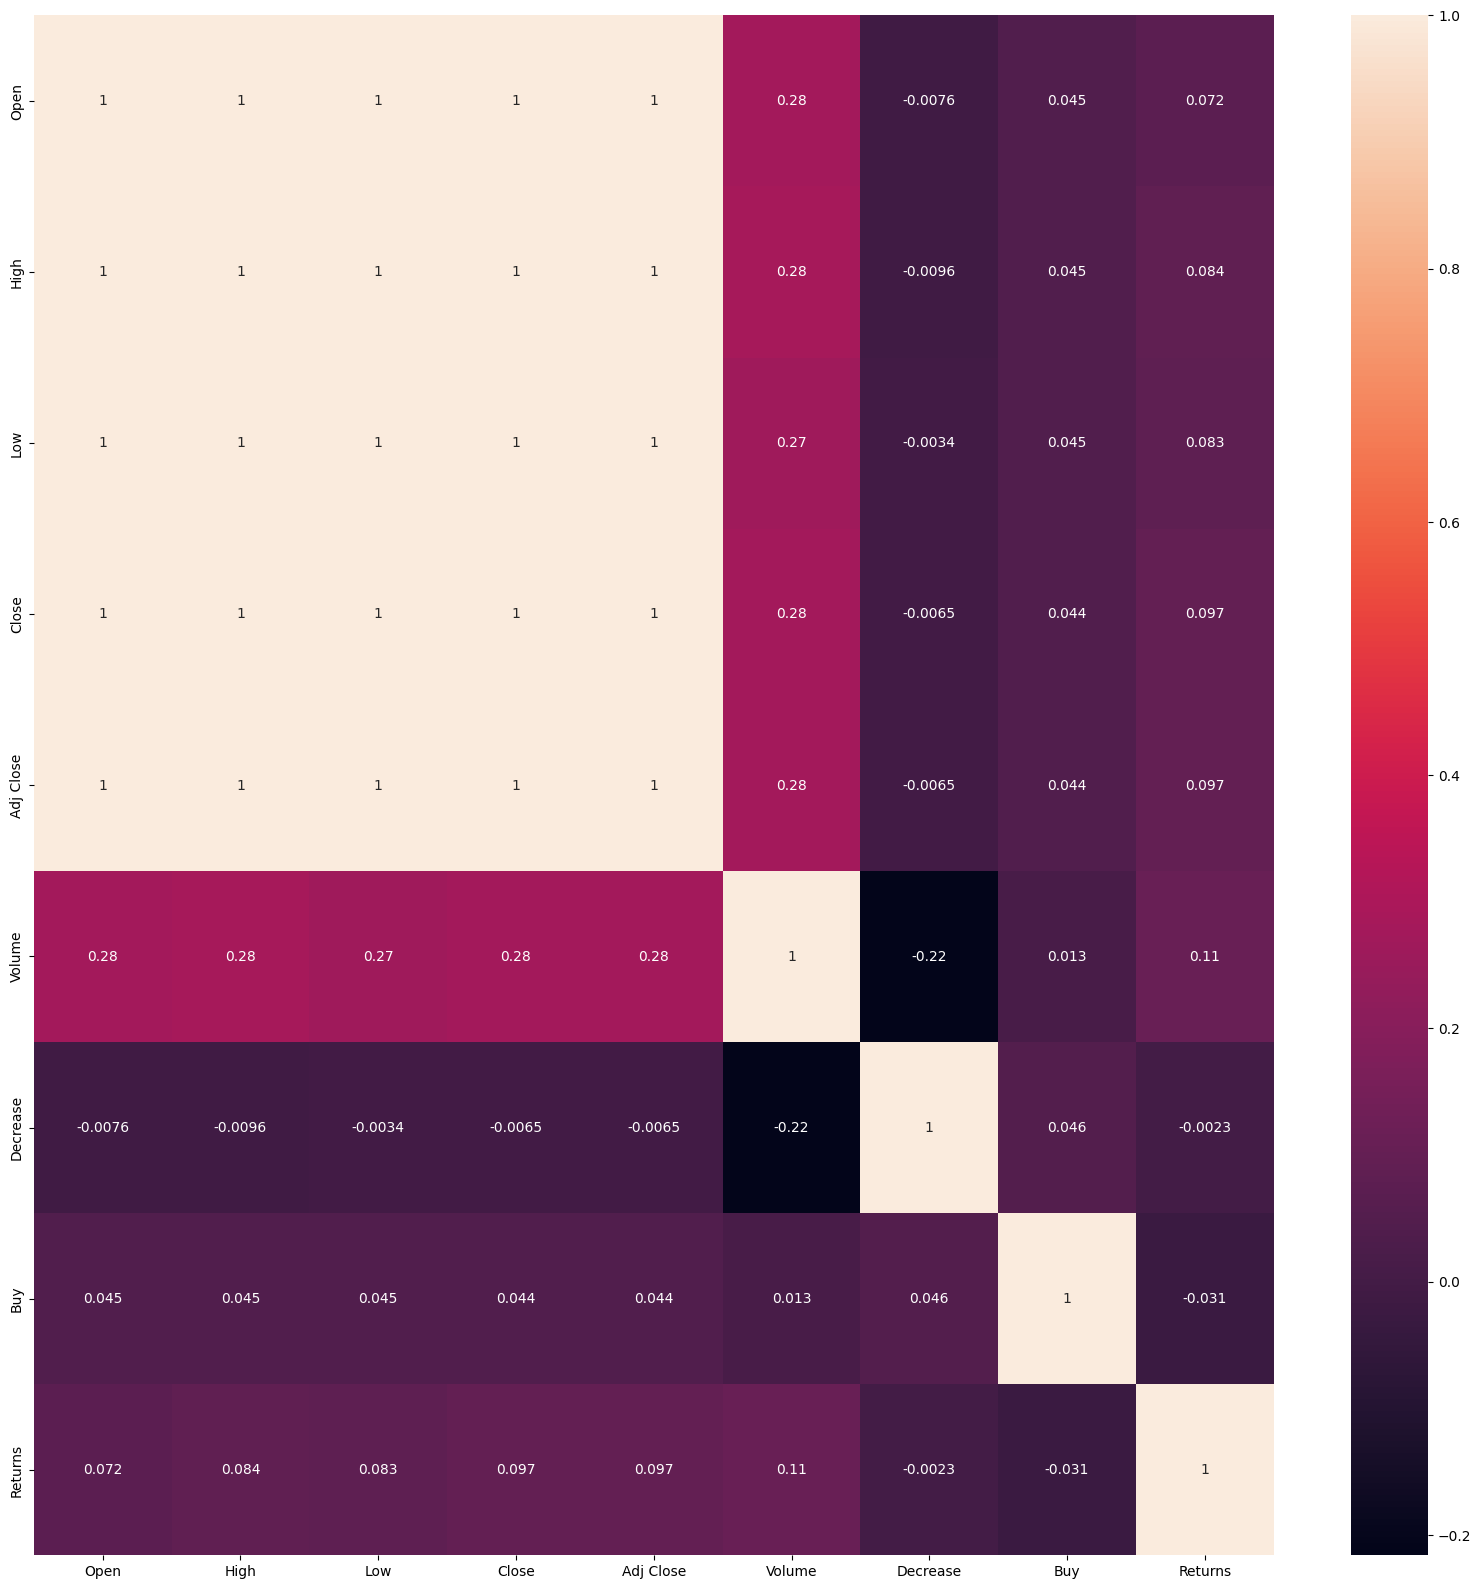

In [ ]:
import seaborn

pyplot.figure(figsize = (20,20))

# Exclude non-numeric columns; adjust the column list as needed
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

seaborn.heatmap(correlation_matrix, annot=True)

pyplot.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


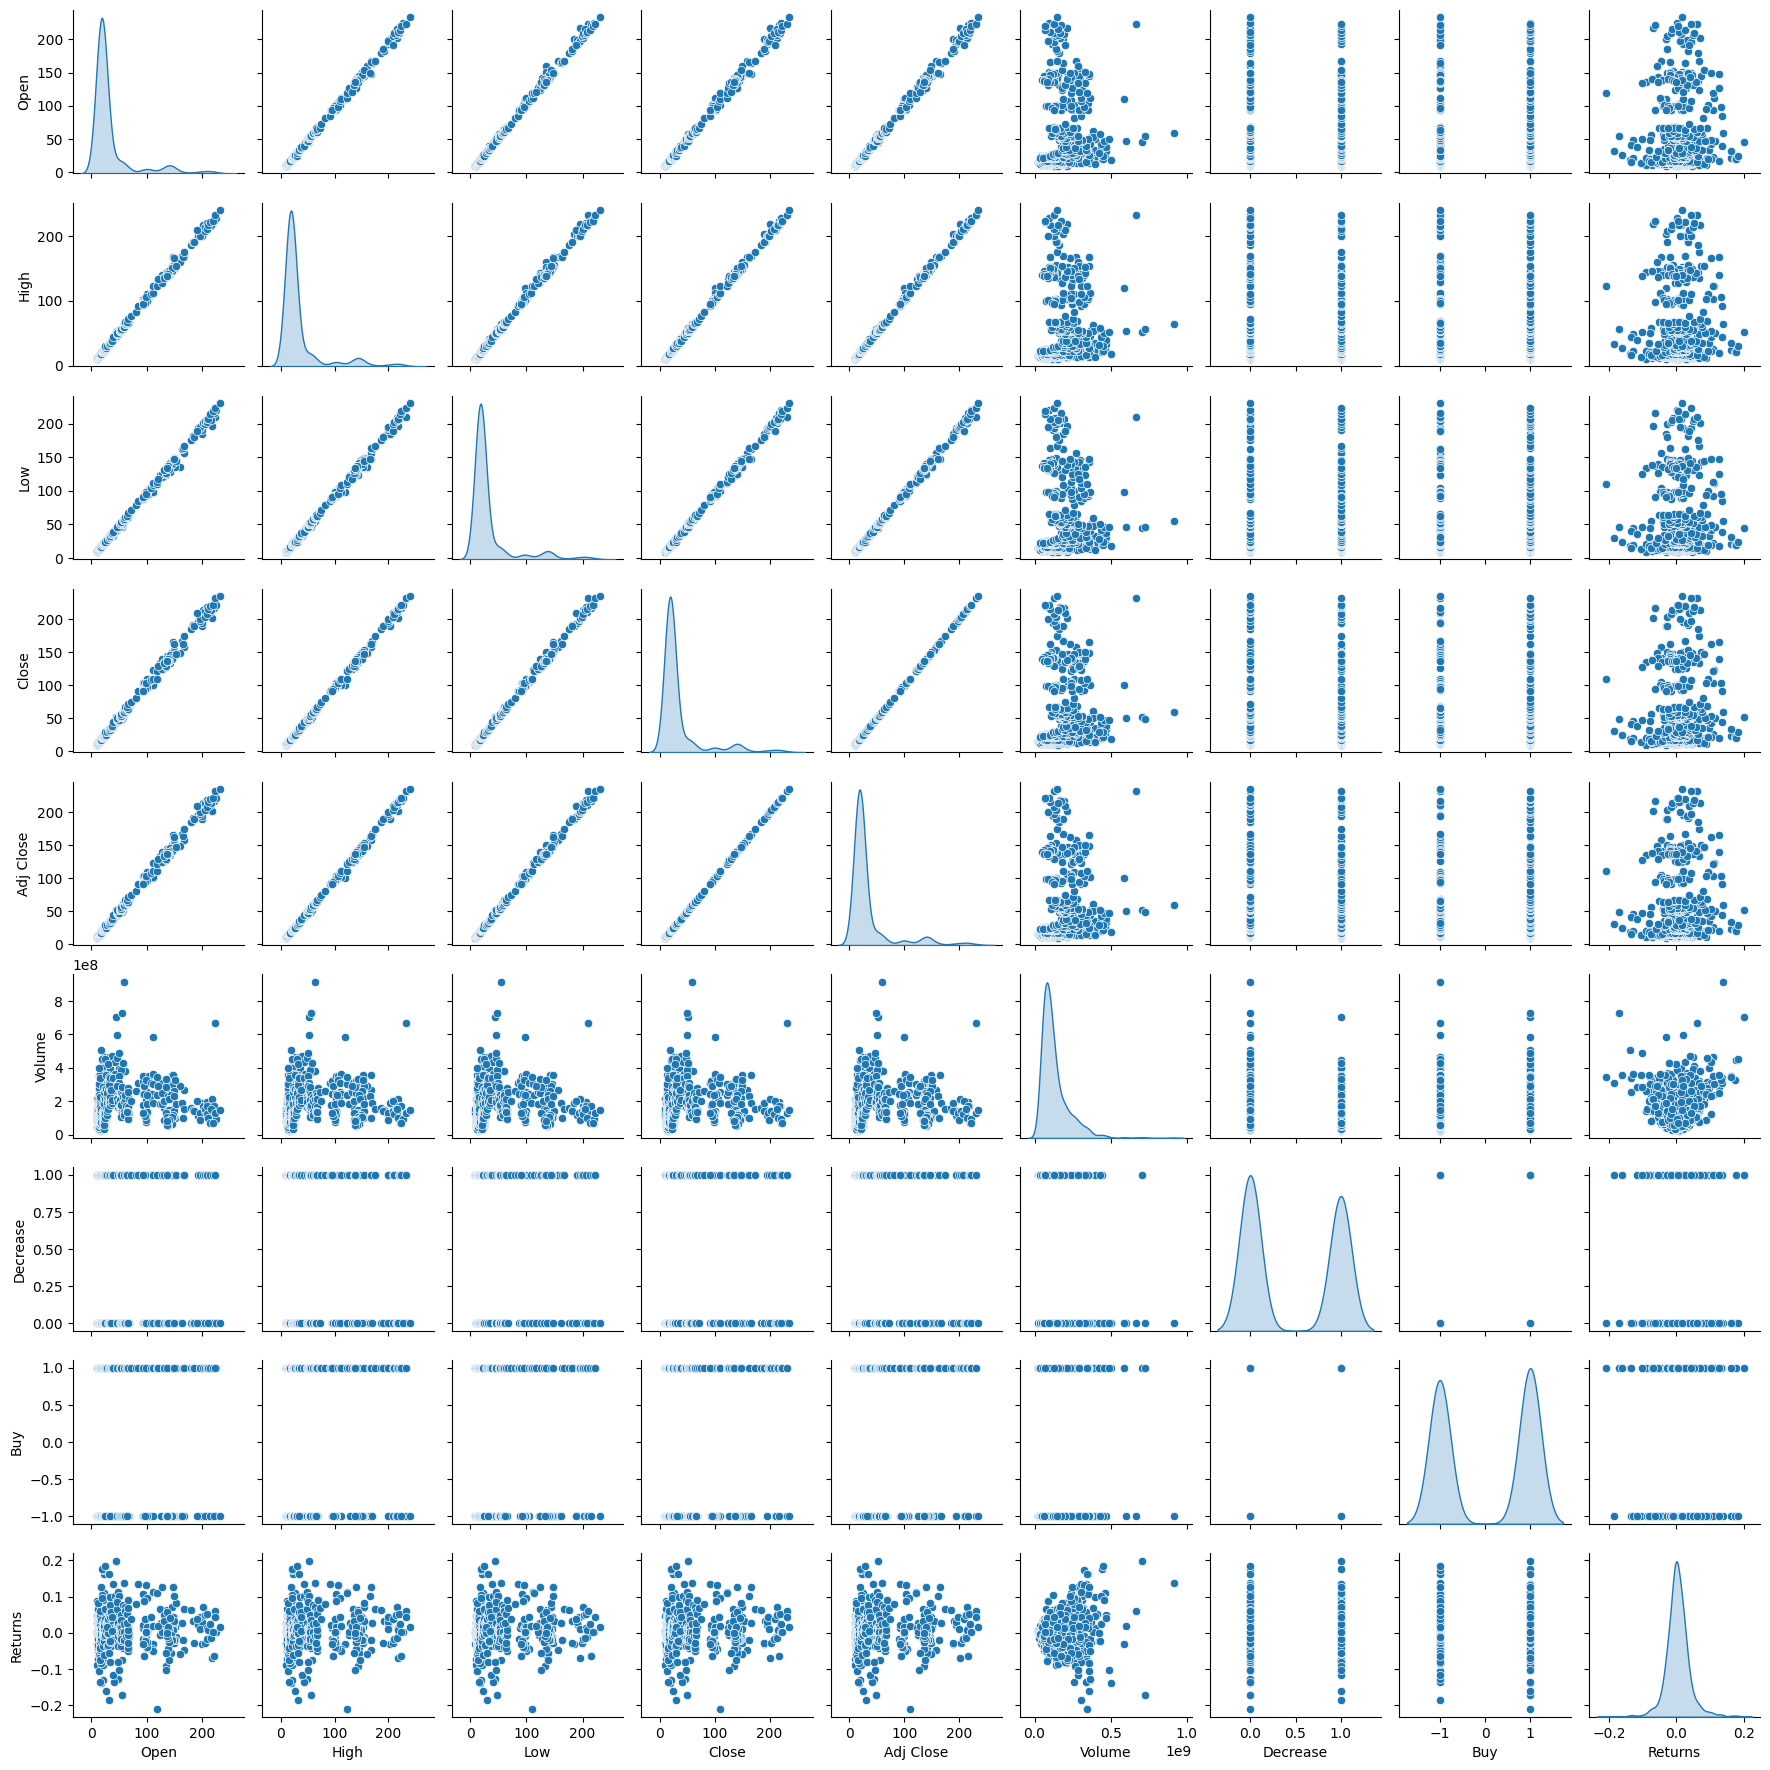

In [ ]:
seaborn.pairplot(dataset, diag_kind = "kde", size = 2)

In [ ]:
from bokeh.plotting import figure, output_notebook

from bokeh.io import show

output_notebook()

PLOT_SIDE_LENGTH = 500

bokeh_figure = figure( width = PLOT_SIDE_LENGTH, height = 500)

bokeh_figure.line(dataset.index, dataset["Low"])

show(bokeh_figure)

In [ ]:
scatter_figure = figure( width = PLOT_SIDE_LENGTH,
                         height = PLOT_SIDE_LENGTH)

circle_x = dataset["Open"]
circle_y = dataset["Close"]

scatter_figure.circle(circle_x, circle_y)

square_x = dataset["High"]
square_y = dataset["Low"]

scatter_figure.square(square_x, square_y, color = "green")

output_notebook()  # ensures to run the program

show(scatter_figure)

In [ ]:
from mpl_toolkits import mplot3d

figure = pyplot.figure()

figure_axes = pyplot.axes(projection = "3d")    # 3D !!!

xdata = dataset["Open"]

ydata = dataset["High"]

zdata = dataset["Adj Close"]

pyplot.xlabel("Open")
pyplot.ylabel("High")


# cant do pyplot.zlabel("Adj Close") because pyplot is 2D


figure_axes.scatter3D(xdata,ydata,zdata)

In [ ]:
from yellowbrick.features import Rank1D

features = dataset[["Open", "High", "Low", "Volume", "Decrease", "Buy", "Returns"]]

features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-01-05 to 2020-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      1258 non-null   float64
 1   High      1258 non-null   float64
 2   Low       1258 non-null   float64
 3   Volume    1258 non-null   int64  
 4   Decrease  1258 non-null   int64  
 5   Buy       1258 non-null   int64  
 6   Returns   1258 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 78.6 KB


In [ ]:
X = features.to_numpy()

X.shape


(1258, 7)

In [ ]:
y = dataset["Adj Close"].to_numpy()

y.shape

(1258,)

In [ ]:
#ERROR


visualizer = Rank1D(features = features,
                    algorithm = "shapiro")


visualizer.fit(X, y)

visualizer.transform(X)

visualizer.poof()  #show :)



YellowbrickValueError: number of supplied feature names does not match the number of columns in the training data.

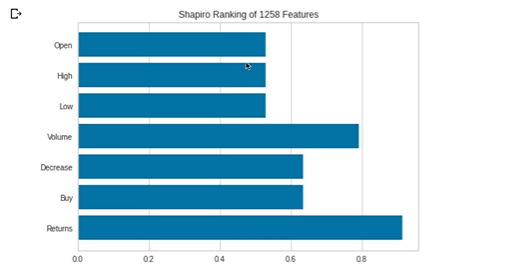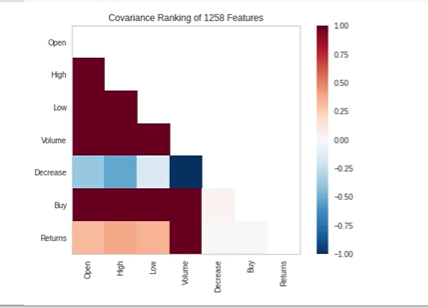

In [ ]:
#ERROR


from yellowbrick.features import Rank2D

visualizer = Rank2D(features = features,
                    algorithm = "covariance")

visualizer.fit(X, y)

visualizer.transform(X)

visualizer.poof()  #show :)

YellowbrickValueError: number of supplied feature names does not match the number of columns in the training data.

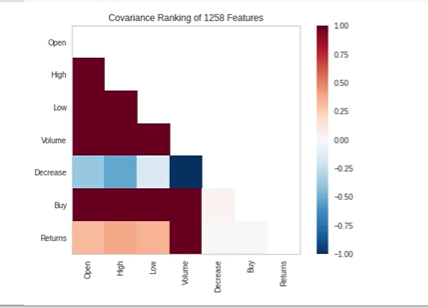

In [ ]:
dataframe_objects = dataset.select_dtypes(include = ["object"]).copy()

dataframe_objects

,Class
Date,
2016-01-05,Positive
2016-01-06,Negative
2016-01-07,Positive
2016-01-08,Negative
2016-01-11,Negative
...,...
2020-12-24,Positive
2020-12-28,Negative
2020-12-29,Negative


In [ ]:
dataframe_ints= dataset.select_dtypes(include = ["int"]).copy()

dataframe_ints

,Volume,Decrease,Buy
Date,,,
2016-01-05,47802000,1,-1
2016-01-06,56686500,0,-1
2016-01-07,53314500,1,-1
2016-01-08,54421500,1,-1
2016-01-11,61371000,0,1
...,...,...,...
2020-12-24,68596800,1,1
2020-12-28,96835800,0,1
2020-12-29,68732400,1,1


In [ ]:
number_of_positive_returns = dataframe_objects[dataframe_objects == "Positive"].count().sum()

number_of_positive_returns

632

In [ ]:
number_of_negative_returns = dataframe_objects[dataframe_objects == "Negative"].count().sum()

number_of_negative_returns

626

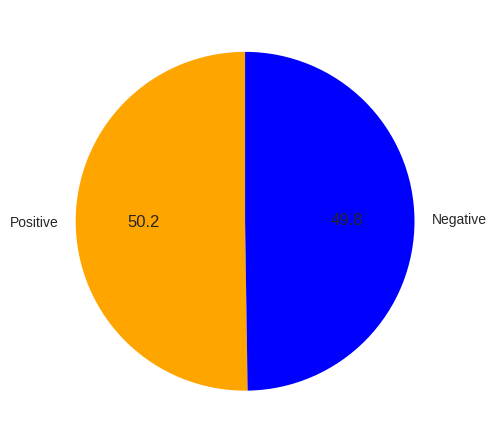

In [ ]:
list_of_returns_counts = [number_of_positive_returns,number_of_negative_returns ]

COLUMN_NAMES = ["Positive", "Negative"]

PIE_CHART_COLORS = ["orange", "blue"]

pyplot.pie(list_of_returns_counts,
           labels = COLUMN_NAMES,
           startangle = 90,
           colors = PIE_CHART_COLORS,
           autopct = "%.1f")

pyplot.show()